In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

In [2]:
data = pd.read_excel('./data/dataset.xlsx')
kospi_200_items1 = data.dropna(axis=0)

kospi_200_items = pd.DataFrame()
for i in ['현대건설','대우건설','GS건설','대림산업','삼성엔지니어링','HDC','아이에스동서']:
    a = pd.DataFrame(kospi_200_items1[kospi_200_items1.Name == i])
    kospi_200_items = kospi_200_items.append(a)

In [3]:
def data_sp(data):
    com_name_set = list(set(data.Name))
    
    ## 18년도 3,6월 이전 이후로 나누기
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    for i in range(len(com_name_set)):
        sub_set = data[ data.Name == com_name_set[i]]
        train_set = train_set.append(sub_set[:-2])
        test_set = test_set.append(sub_set[-2:])
    return train_set , test_set

In [4]:
train,test = data_sp(kospi_200_items)

In [5]:
print(train.shape , test.shape) # (3153, 13) (382, 13)

(84, 45) (14, 45)


In [6]:
## train test를 X,Y 나누기
train_X = train[['부채비율(%)', '총자산/총자본(%)', '매출액증가율(전년동기)(%)', '매출액증가율(전분기)(%)',
       '매출총이익증가율(전년동기)(%)', '매출총이익증가율(전분기)(%)', '영업이익증가율(전년동기)(%)',
       '영업이익증가율(전분기)(%)', '당기순이익증가율(전년동기)(%)', '당기순이익증가율(전분기)(%)',
       '총포괄이익증가율(전년동기)(%)', '총포괄이익증가율(전분기)(%)', 'EBITDA증가율(전년동기)(%)',
       'EBITDA증가율(전분기)(%)', '총자산증가율(전년동기)(%)', '총자산증가율(전분기)(%)',
       '총부채증가율(전년동기)(%)', '총부채증가율(전분기)(%)', '총자본증가율(전년동기)(%)',
       '총자본증가율(전분기)(%)', 'EPS증가율(전년동기)(%)', 'EPS증가율(전분기)(%)',
       'BPS증가율(전년동기)(%)', 'BPS증가율(전분기)(%)', 'ROA(총포괄이익)(%)', 'ROE(당기순이익)(%)',
       '총자산회전율(회)', '총부채회전율(회)', '총자본회전율(회)', '현금및현금성자산구성비율(%)',
       '차입부채/EBITDA(배)', '변동성 (20일)', '거래량 (20일 평균)(주)', '외국인보유비중(티커)(%)',
       '공매도거래량 (20일)(주)', '순매수수량(개인)(20일합산)(주)', '순매수수량(기관계)(20일합산)(주)',
       '순매수수량(외국인계)(20일합산)(주)', 'PER(IFRS-연결)', 'PSR(IFRS-연결)', 'PBR(IFRS-연결)',
       '수익률 (1개월)(%)']]

test_X = test[['부채비율(%)', '총자산/총자본(%)', '매출액증가율(전년동기)(%)', '매출액증가율(전분기)(%)',
       '매출총이익증가율(전년동기)(%)', '매출총이익증가율(전분기)(%)', '영업이익증가율(전년동기)(%)',
       '영업이익증가율(전분기)(%)', '당기순이익증가율(전년동기)(%)', '당기순이익증가율(전분기)(%)',
       '총포괄이익증가율(전년동기)(%)', '총포괄이익증가율(전분기)(%)', 'EBITDA증가율(전년동기)(%)',
       'EBITDA증가율(전분기)(%)', '총자산증가율(전년동기)(%)', '총자산증가율(전분기)(%)',
       '총부채증가율(전년동기)(%)', '총부채증가율(전분기)(%)', '총자본증가율(전년동기)(%)',
       '총자본증가율(전분기)(%)', 'EPS증가율(전년동기)(%)', 'EPS증가율(전분기)(%)',
       'BPS증가율(전년동기)(%)', 'BPS증가율(전분기)(%)', 'ROA(총포괄이익)(%)', 'ROE(당기순이익)(%)',
       '총자산회전율(회)', '총부채회전율(회)', '총자본회전율(회)', '현금및현금성자산구성비율(%)',
       '차입부채/EBITDA(배)', '변동성 (20일)', '거래량 (20일 평균)(주)', '외국인보유비중(티커)(%)',
       '공매도거래량 (20일)(주)', '순매수수량(개인)(20일합산)(주)', '순매수수량(기관계)(20일합산)(주)',
       '순매수수량(외국인계)(20일합산)(주)', 'PER(IFRS-연결)', 'PSR(IFRS-연결)', 'PBR(IFRS-연결)',
       '수익률 (1개월)(%)']]

train_Y = train['수익률 (3개월)(%)']
test_Y = test['수익률 (3개월)(%)']

In [7]:
## 시각화
import seaborn as sns
# 한글 처리 시각화
import matplotlib.pyplot as plt
# 주피터 내장
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc

# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

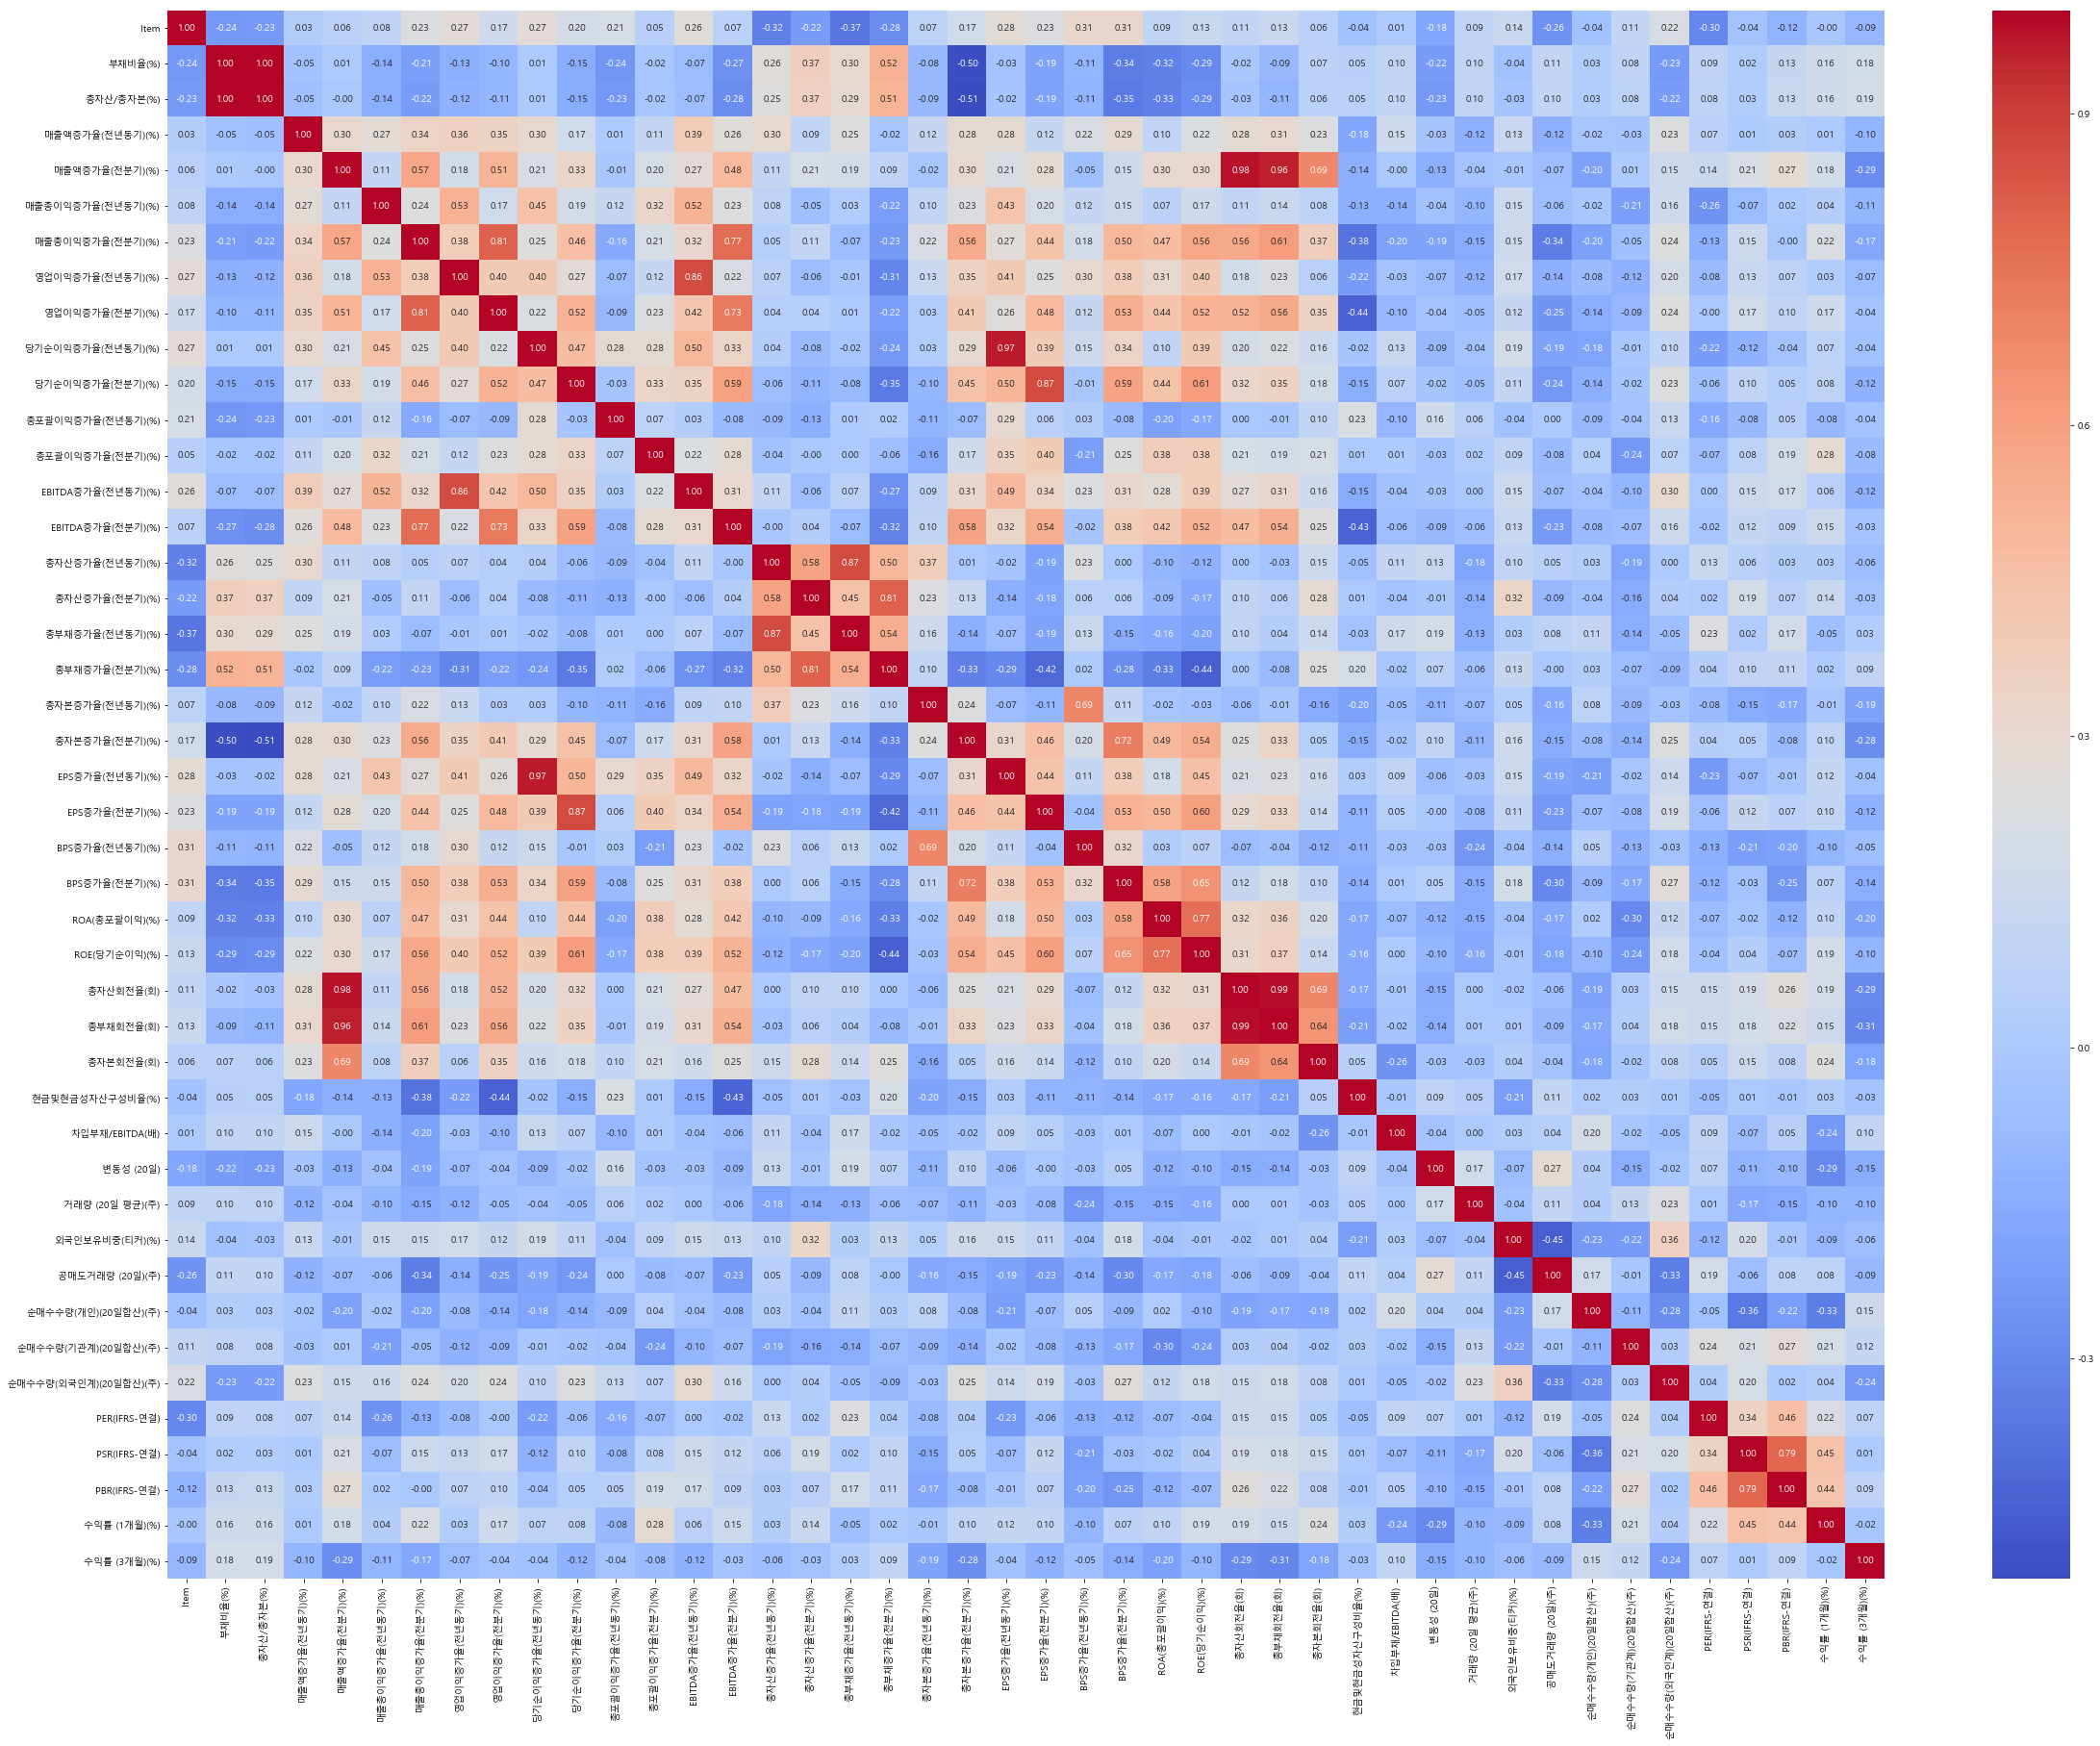

In [8]:
plt.figure(figsize=(40,30))
g = sns.heatmap(kospi_200_items.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

<Figure size 2880x2160 with 0 Axes>

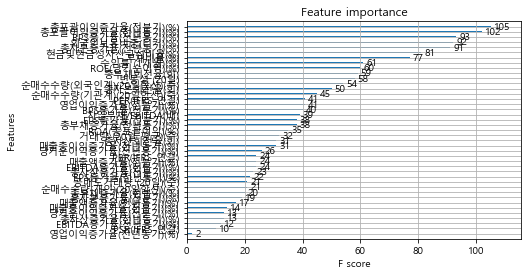

In [9]:
from numpy import loadtxt
from xgboost import  XGBClassifier
from xgboost import plot_importance
import xgboost
model = XGBClassifier()
model.fit(train_X,train_Y)
plt.figure(figsize=(40,30))
plot_importance(model)
plt.show()

In [11]:
model.score(test_X,test_Y)

0.35714285714285715

In [12]:
from sklearn.metrics import confusion_matrix